#### Iris dataset example using PyTorch
Just to test basic pytorch stuff

In [1]:
# imports
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
# IRIS data set
iris_data = load_iris()
X = iris_data['data']
y = iris_data['target']
names = iris_data['target_names']
feature_names = iris_data['feature_names']

# Rescale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

print(f"Names {names}")
print(f"Features {feature_names}")
print(f"Data size {len(X)}")
print(f"Train {len(X_train)} Test {len(X_test)}")


Names ['setosa' 'versicolor' 'virginica']
Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data size 150
Train 120 Test 30


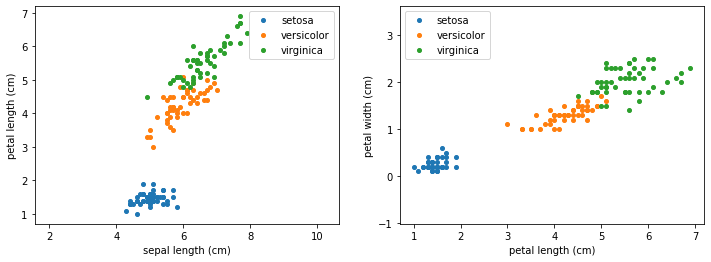

In [3]:
feature1 = feature_names.index("sepal length (cm)")
feature2 = feature_names.index("petal length (cm)")
feature3 = feature_names.index("petal width (cm)")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, feature1], X_plot[:, feature2], 
             linestyle='none', 
             marker='o', 
             markersize=4,
             label=target_name)
    ax2.plot(X_plot[:, feature2], X_plot[:, feature3], 
             linestyle='none', 
             marker='o', 
             markersize=4,
             label=target_name)
    
    
ax1.set_xlabel(feature_names[feature1])
ax1.set_ylabel(feature_names[feature2])
ax1.axis('equal')
ax1.legend();
ax2.set_xlabel(feature_names[feature2])
ax2.set_ylabel(feature_names[feature3])
ax2.axis('equal')
ax2.legend();


In [4]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        x = nn.functional.relu(self.layer2(x))
        x = nn.functional.softmax(self.layer3(x), dim=1)
        return x

In [5]:
model = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [6]:
EPOCHS  = 200
X_train_v = Variable(torch.from_numpy(X_train)).float()
y_train_v = Variable(torch.from_numpy(y_train)).long()
X_test_v  = Variable(torch.from_numpy(X_test)).float()
y_test_v  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))


for epoch in range(EPOCHS):
    y_pred = model(X_train_v)
    loss = loss_fn(y_pred, y_train_v)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test_v)
        correct = (torch.argmax(y_pred, dim=1) == y_test_v).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

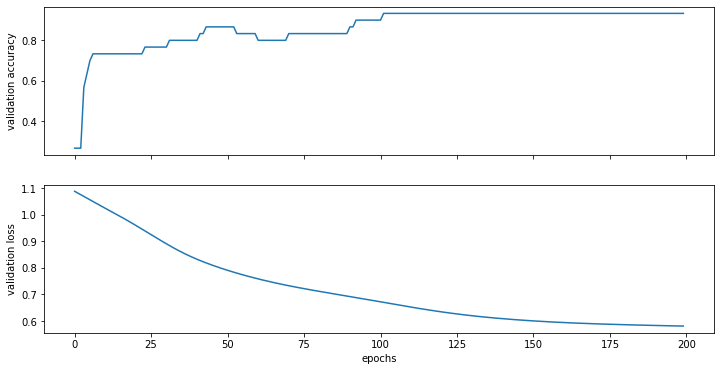

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

In [8]:
### Prediction
f1_max = max(X[0:, 0])
f2_max = max(X[0:, 1])
f3_max = max(X[0:, 2])
f4_max = max(X[0:, 3])

def predict(f):    
    # test = torch.tensor([[float(f[0]/f1_max), float(f[1]/f2_max), float(f[2]/f3_max), float(f[3]/f4_max)]])
    test = torch.tensor([f], dtype=torch.float32)
    pred = model(test)
    idx = np.argmax(pred.detach().numpy())
    return (idx, names[idx])

In [211]:
print(X_train[0:5])
print(y_train[0:5])
print(X_train.dtype)

[[ 0.4321654  -0.59237301  0.59224599  0.79067065]
 [-0.90068117  0.55861082 -1.16971425 -0.92054774]
 [-0.29484182 -0.36217625 -0.08980313  0.13250973]
 [ 2.24968346  1.70959465  1.6721571   1.31719939]
 [-0.53717756 -0.13197948  0.42173371  0.3957741 ]]
[2 0 1 2 1]
float64


In [9]:
for i in range(10):
  p = predict(X_train[i])
  print(p)

(2, 'virginica')
(0, 'setosa')
(1, 'versicolor')
(2, 'virginica')
(1, 'versicolor')
(0, 'setosa')
(2, 'virginica')
(1, 'versicolor')
(1, 'versicolor')
(2, 'virginica')


<ipython-input-8-d71fadef3767>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  test = torch.tensor([f], dtype=torch.float32)


In [200]:
# Misc slicing test
# print(X[0])
# print(X[1])
# print(X[2])
# print(X[3])


f1_max = max(X[0:, 0])
f2_max = max(X[0:, 1])
f3_max = max(X[0:, 2])
f4_max = max(X[0:, 3])
print(f1_max, f2_max, f3_max, f4_max)

7.9 4.4 6.9 2.5
